# Hypothesis Testing - 4

- **$H_0$:**<br>
There is no signification relationship between stimulus repetition and reactions times
<br>

- **$H_1$:**<br>
Repeated stimuli have faster/slower reaction times

If the above H0 is rejected, we can further test the hypothesis as:

- **$H_0$:**<br>
There is no significant relationship between this effect and age. 
<br>

- **$H_1$:**<br>
This effect increases/decreases with age.

### Importing Libraries

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import levene
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

###  Data Preparation

##### We first check if there is a relationship between reaction times and stimulus repetition. 

In [26]:
e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")
e1_sub_ages = pd.read_csv("../data/e1/e1_sub_ages.csv")
learning_merged = pd.merge(e1_learning, e1_sub_ages, on="subject_id")
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [27]:
learning_merged.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made,age
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0,8.04
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0,8.04
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0,8.04
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0,8.04
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0,8.04


In [4]:
e1_learning.isnull().sum()

subject_id                 0
task_part                  0
block_condition            0
block_order                0
task_block                 0
trial_index                0
stimulus                   0
cat_type                   0
mean_cat_reward            0
approach_reward            0
key_press                174
rt                       168
points                     0
stimulus_repetition        0
correct_response           0
correct_response_made    174
dtype: int64

In [29]:
e1_learning.dropna(subset=["rt"], inplace=True)
learning_merged.dropna(subset=["rt"], inplace=True)

In [6]:
# Merge dataframes by subject ID
df = pd.merge(e1_learning[["subject_id", "stimulus_repetition", "rt"]], e1_sub_ages[["subject_id", "age"]], on="subject_id")
df.head()

,subject_id,stimulus_repetition,rt,age
0,3768,1,1148.0,8.04
1,3768,1,347.0,8.04
2,3768,1,618.0,8.04
3,3768,2,306.0,8.04
4,3768,1,1521.0,8.04


In [7]:
df.isnull().sum()

subject_id             0
stimulus_repetition    0
rt                     0
age                    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46038 entries, 0 to 46037
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_id           46038 non-null  int64  
 1   stimulus_repetition  46038 non-null  int64  
 2   rt                   46038 non-null  float64
 3   age                  46038 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.4 MB


In [34]:
df.describe()

,subject_id,stimulus_repetition,rt,age
count,46038.000000,46038.000000,46038.000000,46038.000000
mean,5401.044246,2.942026,904.241448,15.882542
std,1255.106574,1.730980,375.571777,4.998539
min,3718.000000,1.000000,0.100000,8.010000
25%,4045.000000,1.000000,648.900000,11.620000
50%,5640.000000,3.000000,815.550000,15.400000
75%,6293.000000,4.000000,1065.500000,19.870000
max,8071.000000,6.000000,3023.000000,25.940000


In [35]:
# # Check for missing values
# df.dropna(subset=["rt"], inplace=True)

# # Convert infinite values to NaN
# df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [8]:
# Calculate summary statistics
summary_stats = df.groupby('stimulus_repetition')['rt'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
stimulus_repetition,,,,,,,,
1,13526.0,992.384437,395.659905,0.3,718.825,916.80,1178.850,3023.0
2,8132.0,912.419270,371.280360,0.5,659.700,826.30,1077.850,2917.6
3,8122.0,895.898129,370.295603,0.1,649.000,807.15,1048.375,2991.0
4,5416.0,852.924760,351.663504,0.1,623.475,763.75,988.875,2998.0
5,5427.0,831.326755,352.171627,5.2,610.000,735.70,952.800,2990.4
6,5415.0,808.706741,333.088636,0.6,597.000,720.10,930.750,2996.0


In [9]:
e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")

In [10]:
# Merge dataframes by subject ID
df2 = pd.merge(e1_learning[["subject_id", "stimulus_repetition"]], e1_memory[["subject_id", "rt"]], on="subject_id")
df2.head()

,subject_id,stimulus_repetition,rt
0,3768,1,1866.0
1,3768,1,1792.0
2,3768,1,3074.0
3,3768,1,1411.0
4,3768,1,3348.0


In [11]:
# Calculate summary statistics
summary_stats = df2.groupby('stimulus_repetition')['rt'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
stimulus_repetition,,,,,,,,
1,2611782.0,1455.443598,781.056609,0.9,962.2,1265.8,1717.0,9991.8
2,1570222.0,1455.370972,780.483686,0.9,962.2,1265.8,1717.1,9991.8
3,1568332.0,1455.154507,779.558798,0.9,962.5,1266.0,1717.0,9991.8
4,1045804.0,1455.507908,779.903819,0.9,962.8,1266.2,1717.1,9991.8
5,1047893.0,1455.943818,781.403355,0.9,962.5,1266.2,1717.7,9991.8
6,1045586.0,1455.771180,781.386146,0.9,962.3,1266.0,1717.5,9991.8


## Reaction time Vs Stimulus Repetition

##### Check normality of reaction times within each level of stimulus repetition

In [12]:
# Create separate data groups for each level of stimulus repetition
data_groups = {}
for repetition in range(1, 7):
    data_groups[repetition] = df[df['stimulus_repetition'] == repetition]['rt']


In [13]:
from scipy.stats import kstest

# Check normality for each group
normality_results = {}
for repetition, data in data_groups.items():
    # Perform Kolmogorov-Smirnov test for normality
    ks_stat, ks_p_val = kstest(data, 'norm')
    normality_results[repetition] = {'Statistic': ks_stat, 'P-value': ks_p_val}

normality_results

{1: {'Statistic': 0.9999260623225081, 'P-value': 0.0},
 2: {'Statistic': 0.999877029021151, 'P-value': 0.0},
 3: {'Statistic': 0.9997537552327013, 'P-value': 0.0},
 4: {'Statistic': 0.9998153618906942, 'P-value': 0.0},
 5: {'Statistic': 0.9999999003557626, 'P-value': 0.0},
 6: {'Statistic': 0.9998019820469806, 'P-value': 0.0}}

In [75]:
from scipy.stats import shapiro

# Check normality for each group
normality_results = {}
for repetition, data in data_groups.items():
    shapiro_stat, shapiro_p_val = shapiro(data)
    normality_results[repetition] = {'Statistic': shapiro_stat, 'P-value': shapiro_p_val}

normality_results


{1: {'Statistic': 0.9234255714209729, 'P-value': 3.729338303657074e-63},
 2: {'Statistic': 0.9013802595086886, 'P-value': 4.884749765755629e-58},
 3: {'Statistic': 0.8893529572476361, 'P-value': 3.5804647619597896e-60},
 4: {'Statistic': 0.8728386388180551, 'P-value': 7.476664369127225e-55},
 5: {'Statistic': 0.8467920899414685, 'P-value': 2.865477224100767e-58},
 6: {'Statistic': 0.8513713737815346, 'P-value': 1.142535049575139e-57}}

- The reaction time data in each group does not follow a normal distribution
<br>

- Also, the p-value seems 0 but in reality it indicates that the test statistic is extremely large relative to the critical values.

#### Levene's test for homogeneity of variances

In [15]:
from scipy.stats import levene

# Check homogeneity of variances for each group
homogeneity_results = {}
for repetition, data in data_groups.items():
    try:
        levene_stat, levene_p_val = levene(*data_groups.values())
        homogeneity_results[repetition] = {'Statistic': levene_stat, 'P-value': levene_p_val}
    except Exception as e:
        homogeneity_results[repetition] = {'Statistic': None, 'P-value': None, 'Error': str(e)}

homogeneity_results


{1: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 2: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 3: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 4: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 5: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65},
 6: {'Statistic': 62.2914098596463, 'P-value': 5.760650672144678e-65}}

- The extremely low p-values ($<0.001$) obtained from `Levene's test` indicate strong evidence against the null hypothesis of homogeneity of variances across the groups. Therefore, we reject the null hypothesis and conclude that there are significant differences in variances between the groups. 
<br>

- Since, the data is not normally distributed, so we use the Kruskal-Wallis test to check if there is a significant difference in reaction times between the different levels of stimulus repetition.

#### Kruskal-Wallis test

In [16]:
from scipy.stats import kruskal

# Extract the reaction time data for each group
group1_rt = data_groups[1]
group2_rt = data_groups[2]
group3_rt = data_groups[3]
group4_rt = data_groups[4]
group5_rt = data_groups[5]
group6_rt = data_groups[6]

# Perform Kruskal-Wallis test
kw_stat, kw_p_val = kruskal(group1_rt, group2_rt, group3_rt, group4_rt, group5_rt, group6_rt)
print("Kruskal-Wallis Test - Statistic:", kw_stat)
print("Kruskal-Wallis Test - P-value:", kw_p_val)


Kruskal-Wallis Test - Statistic: 1966.9712649951966
Kruskal-Wallis Test - P-value: 0.0


- Based on the Kruskal-Wallis test, there is a significant difference among the groups in terms of reaction times (Kruskal-Wallis Test Statistic = $1966.97$, p < $0.001$). 
<br>

- Therefore, we reject the null hypothesis and conclude that there is a significant relationship between stimulus repetition and reaction times.


#### Post Hoc tests

- Since we have more than two groups and the Kruskal-Wallis test is significant, we need to conduct post hoc tests to determine which groups are significantly different from each other.

In [45]:
# %pip install scikit-posthocs

In [17]:
import scikit_posthocs as sp

# Extract reaction time data for each stimulus repetition group
data_groups_list = [data for repetition, data in data_groups.items()]

# Perform Dunn's post hoc test
dunn_results = sp.posthoc_dunn(data_groups_list, p_adjust='holm')

# Display the post hoc test results
print("Dunn's Post Hoc Test Results:")
dunn_results

Dunn's Post Hoc Test Results:


,1,2,3,4,5,6
1,1.000000e+00,2.393293e-64,2.837577e-94,1.596125e-155,5.119809e-225,2.377423e-279
2,2.393293e-64,1.000000e+00,2.161058e-03,2.362354e-26,4.329976e-55,9.566663e-81
3,2.837577e-94,2.161058e-03,1.000000e+00,1.888891e-14,7.169288e-37,2.872148e-58
4,1.596125e-155,2.362354e-26,1.888891e-14,1.000000e+00,1.716857e-05,8.828812e-14
5,5.119809e-225,4.329976e-55,7.169288e-37,1.716857e-05,1.000000e+00,2.161058e-03
6,2.377423e-279,9.566663e-81,2.872148e-58,8.828812e-14,2.161058e-03,1.000000e+00


- Holm correction method is used as it strikes a balance between controlling the family-wise error rate and maintaining statistical power

#### Visualisation

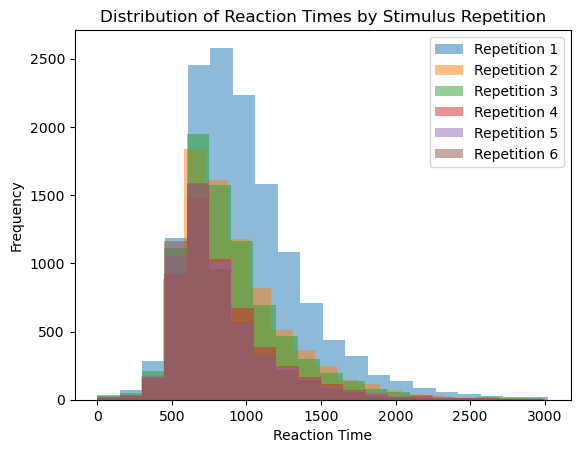

In [18]:
# Plot the distribution of reaction times for each level of stimulus repetition
for repetition, group in df.groupby('stimulus_repetition'):
    plt.hist(group['rt'], bins=20, alpha=0.5, label=f"Repetition {repetition}")

plt.xlabel("Reaction Time")
plt.ylabel("Frequency")
plt.title("Distribution of Reaction Times by Stimulus Repetition")
plt.legend()
plt.show()

/tmp/ipykernel_17502/2270157571.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='stimulus_repetition', y='rt', palette='crest')
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


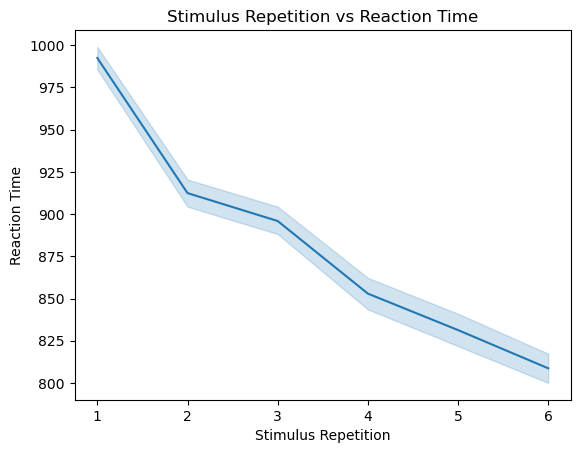

In [22]:
sns.lineplot(data=df, x='stimulus_repetition', y='rt', palette='crest')
plt.title("Stimulus Repetition vs Reaction Time")
plt.xlabel("Stimulus Repetition")
plt.ylabel("Reaction Time")
plt.show()

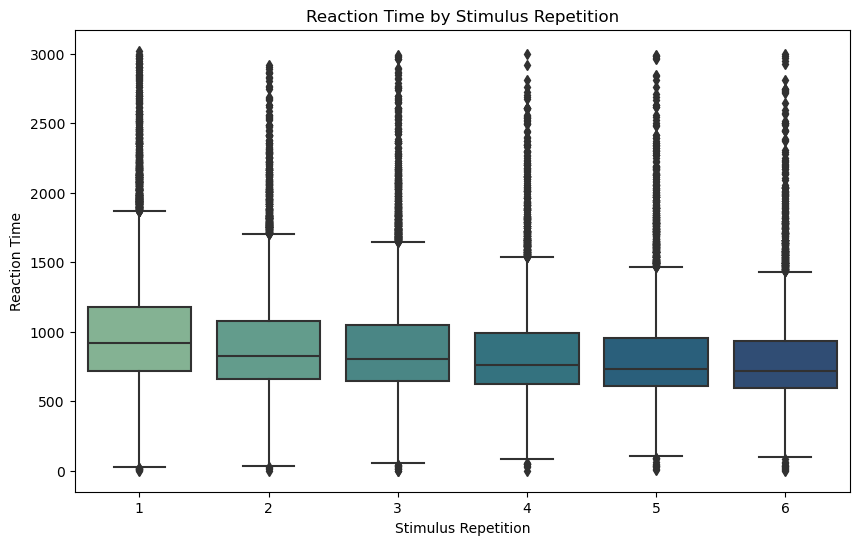

In [23]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stimulus_repetition', y='rt', data=df, palette='crest')
plt.title('Reaction Time by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Reaction Time')
plt.show()


/tmp/ipykernel_17502/317334458.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='stimulus_repetition', y='rt', data=df, ci='sd', palette='crest')


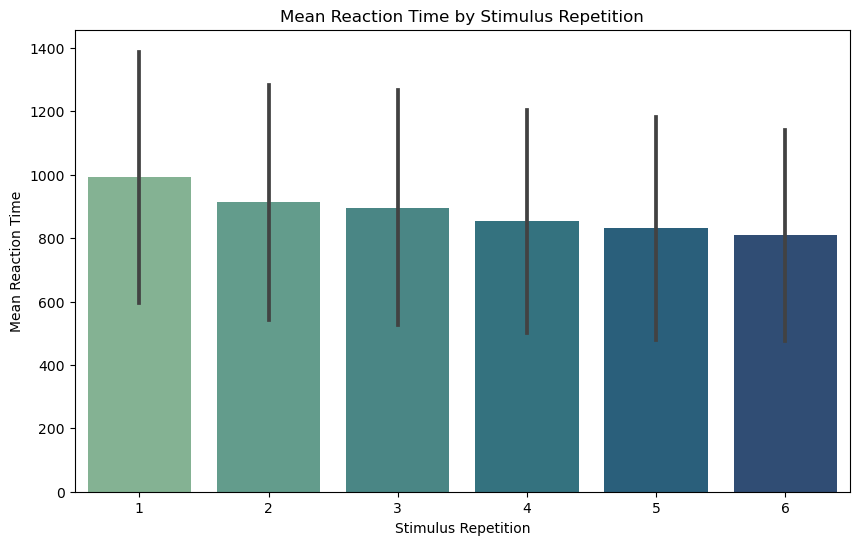

In [24]:
# Bar plot
sns.set_palette('Blues')
plt.figure(figsize=(10, 6))
sns.barplot(x='stimulus_repetition', y='rt', data=df, ci='sd', palette='crest')
plt.title('Mean Reaction Time by Stimulus Repetition')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Mean Reaction Time')
plt.show()

> Reaction times tend to decrease as the stimulus is repeated.

#### Inferences

- The results indicate that there is a significant relationship between stimulus repetition and reaction times. Specifically, the Kruskal-Wallis test showed a significant difference in reaction times across different levels of stimulus repetition (p < 0.05). 

- Additionally, it's important to note that the p-value obtained from the Kruskal-Wallis test was very small (p < 0.001), indicating strong evidence against the null hypothesis. This suggests that the observed differences in reaction times across stimulus repetition levels are unlikely to be due to random chance alone.

**Therefore, based on the results, we reject the null hypothesis (H0) and conclude that there is a significant relationship between stimulus repetition and reaction times. Furthermore, reaction time decreases as stimulus is repeated.**

Now we will perform a regression analysis to examine the relationship between stimulus repetition, reaction times, and age. 

## Relationship between stimulus repetition, reaction times, and age

#### We will test if there is a significant relationship between `age` (categorized into children, adolescents, and adults) and `reaction time` for different `stimulus repetitions`. 



In [32]:
# Divide Age into Age Groups
bins = [0, 12, 19, float('inf')]
labels = ['Children', 'Adolescents', 'Adults']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()


,subject_id,stimulus_repetition,rt,age,age_group
0,3768,1,1148.0,8.04,Children
1,3768,1,347.0,8.04,Children
2,3768,1,618.0,8.04,Children
3,3768,2,306.0,8.04,Children
4,3768,1,1521.0,8.04,Children


### Shapiro-Wilk test for normality and Levene's test for homogeneity of variances 

In [76]:
# Shapiro-Wilk test for normality

pretest_results = []
shapiro_results = df.groupby(['stimulus_repetition', 'age_group']).apply(lambda x: shapiro(x['rt'])[1]).unstack()
pretest_results.append(shapiro_results)

In [77]:
# Levene's test for homogeneity of variances
levene_results = df.groupby('stimulus_repetition').apply(lambda x: levene(*[x[x['age_group'] == age_group]['rt'] for age_group in labels])[1])
pretest_results.append(levene_results)

In [79]:
# Convert results to a table format
table_headers = ['Stimulus Repetition'] + labels
table_data = []

# Add Shapiro-Wilk test results
for repetition, values in shapiro_results.iterrows():
    row = [repetition] + list(values)
    table_data.append(row)

# Add Levene's test results
levene_row = ['Levene\'s Test (Homogeneity of Variances)'] + list(levene_results)
table_data.append(levene_row)

# Print results table
print(tabulate(table_data, headers=table_headers, tablefmt='grid'))

+------------------------------------------+-------------+---------------+-------------+
| Stimulus Repetition                      |    Children |   Adolescents |      Adults |
+==========================================+=============+===============+=============+
| 1                                        | 1.5229e-37  |   7.18606e-46 | 2.92168e-42 |
+------------------------------------------+-------------+---------------+-------------+
| 2                                        | 8.29574e-33 |   1.18742e-41 | 2.09507e-39 |
+------------------------------------------+-------------+---------------+-------------+
| 3                                        | 1.15117e-34 |   1.77318e-45 | 9.54276e-39 |
+------------------------------------------+-------------+---------------+-------------+
| 4                                        | 7.13008e-29 |   1.8587e-41  | 2.06869e-35 |
+------------------------------------------+-------------+---------------+-------------+
| 5                  

**Shapiro-Wilk Test for Normality:**
- For each stimulus repetition (1 to 6), the p-values obtained from the Shapiro-Wilk tests are extremely small (close to zero), indicating that the null hypothesis of normality is rejected.
- This suggests that the distribution of reaction times within each age group and stimulus repetition is significantly different from a normal distribution.

**Levene's Test for Homogeneity of Variances:**
- The p-values obtained from Levene's test are also extremely small (close to zero) for each stimulus repetition.
- This indicates that the variances of reaction times across different age groups are significantly different from each other.

In summary, the pre-test results suggest that while there are violations of the normality and homogeneity of variances assumptions.

> The assumptions for ANOVA are violated, hence we consider using non-parametric tests such as the Kruskal-Wallis test, which is the non-parametric equivalent of one-way ANOVA. This test does not assume normality or homogeneity of variances. 

### Kruskal Wallis test

In [82]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for each stimulus repetition
for stimulus_repetition in df['stimulus_repetition'].unique():
    data = [df[df['age_group'] == 'Children']['rt'],
            df[df['age_group'] == 'Adolescents']['rt'],
            df[df['age_group'] == 'Adults']['rt']]
    h_statistic, p_value = kruskal(*data)
    print(f"\nKruskal-Wallis Test Results for Stimulus Repetition {stimulus_repetition}:")
    print(f"H-statistic: {h_statistic}")
    print(f"P-value: {p_value}")



Kruskal-Wallis Test Results for Stimulus Repetition 1:
H-statistic: 1960.1919525746268
P-value: 0.0

Kruskal-Wallis Test Results for Stimulus Repetition 2:
H-statistic: 1960.1919525746268
P-value: 0.0

Kruskal-Wallis Test Results for Stimulus Repetition 3:
H-statistic: 1960.1919525746268
P-value: 0.0

Kruskal-Wallis Test Results for Stimulus Repetition 4:
H-statistic: 1960.1919525746268
P-value: 0.0

Kruskal-Wallis Test Results for Stimulus Repetition 5:
H-statistic: 1960.1919525746268
P-value: 0.0

Kruskal-Wallis Test Results for Stimulus Repetition 6:
H-statistic: 1960.1919525746268
P-value: 0.0


#### Infereces 
- The Kruskal-Wallis test results indicate that there are significant differences in reaction times across different age groups for each level of stimulus repetition. The H-statistic represents the Kruskal-Wallis test statistic, and the p-value measures the significance of the differences observed.

- Since the p-values for all stimulus repetitions are very close to zero, it suggests strong evidence against the null hypothesis that there are no differences in reaction times between age groups for each stimulus repetition. Therefore, we can conclude that there are indeed significant differences in reaction times among children, adolescents, and adults across all levels of stimulus repetition.

- However, the Kruskal-Wallis test does not provide information on how the effect of stimulus repetition on reaction times specifically increases or decreases with age. For that we perform post-hoc tests or regression analysis, to examine the relationship between age and reaction times for each stimulus repetition level.

### Post Hoc tests


Since the Kruskal-Wallis test is a non-parametric test and does not assume normality or equal variances, we can perform post-hoc tests to determine which groups differ significantly. We perform the Dunn's test with Bonferroni correction. 

In [84]:
import scikit_posthocs as sp

# Convert grouped data into a dictionary of lists
grouped_data_dict = grouped_data.to_dict()

# Perform Dunn's test with Bonferroni correction
dunn_results = sp.posthoc_dunn(list(grouped_data_dict.values()), p_adjust='bonferroni')

print("Dunn's Test Results:")
dunn_results


Dunn's Test Results:


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.000000e+00,3.933675e-09,5.996185e-15,6.350222e-24,1.177059e-28,4.792620e-47,9.046392e-14,4.882443e-71,1.481312e-90,3.758359e-119,1.446931e-161,2.513748e-180,3.395261e-77,2.652073e-156,2.256406e-179,4.898365e-209,2.973462e-268,5.065243e-294
2,3.933675e-09,1.000000e+00,1.000000e+00,2.054077e-03,2.491848e-05,4.519587e-14,1.000000e+00,1.050712e-17,9.916846e-27,1.070723e-47,1.941369e-72,6.835141e-84,1.084600e-19,8.617627e-70,9.475267e-84,7.135719e-115,1.137508e-155,1.060363e-173
3,5.996185e-15,1.000000e+00,1.000000e+00,4.764892e-01,1.895282e-02,1.881319e-09,1.000000e+00,2.065046e-11,6.198817e-19,5.410919e-38,2.185195e-60,6.631032e-71,5.994610e-13,4.991487e-58,7.968222e-71,3.374527e-101,1.081085e-139,8.460642e-157
4,6.350222e-24,2.054077e-03,4.764892e-01,1.000000e+00,1.000000e+00,7.580497e-02,1.525011e-05,1.620689e-01,6.669110e-05,1.335286e-16,1.699931e-30,2.606576e-37,4.653113e-02,3.892903e-29,2.163971e-37,2.555115e-62,2.937196e-90,7.662602e-103
5,1.177059e-28,2.491848e-05,1.895282e-02,1.000000e+00,1.000000e+00,1.000000e+00,3.278894e-08,1.000000e+00,5.992090e-03,2.263621e-13,3.818151e-26,1.652073e-32,1.000000e+00,6.735498e-25,1.341393e-32,1.166846e-56,1.793767e-83,1.310506e-95
6,4.792620e-47,4.519587e-14,1.881319e-09,7.580497e-02,1.000000e+00,1.000000e+00,3.170374e-20,1.000000e+00,1.000000e+00,8.480909e-05,1.127559e-13,1.886018e-18,1.000000e+00,8.359126e-13,1.468532e-18,3.790392e-39,6.383792e-62,1.938239e-72
7,9.046392e-14,1.000000e+00,1.000000e+00,1.525011e-05,3.278894e-08,3.170374e-20,1.000000e+00,4.898196e-31,5.837645e-46,5.974069e-73,7.534369e-110,9.503668e-127,4.908232e-35,2.221440e-105,4.797536e-126,2.612092e-157,1.959836e-212,8.344335e-237
8,4.882443e-71,1.050712e-17,2.065046e-11,1.620689e-01,1.000000e+00,1.000000e+00,4.898196e-31,1.000000e+00,1.000000e+00,8.548782e-11,5.163807e-26,5.566664e-34,1.000000e+00,2.056317e-24,5.059029e-34,1.233853e-61,2.757308e-95,9.416063e-111
9,1.481312e-90,9.916846e-27,6.198817e-19,6.669110e-05,5.992090e-03,1.000000e+00,5.837645e-46,1.000000e+00,1.000000e+00,4.178729e-05,5.998238e-17,1.516127e-23,1.000000e+00,1.063791e-15,1.253511e-23,4.553785e-49,1.647811e-79,1.093773e-93
10,3.758359e-119,1.070723e-47,5.410919e-38,1.335286e-16,2.263621e-13,8.480909e-05,5.974069e-73,8.548782e-11,4.178729e-05,1.000000e+00,8.084380e-02,1.567872e-04,4.698543e-10,2.073701e-01,1.252936e-04,9.278243e-21,2.376848e-40,6.478525e-50


> The resulting matrix dunn_results contains the pairwise comparison p-values between different groups.

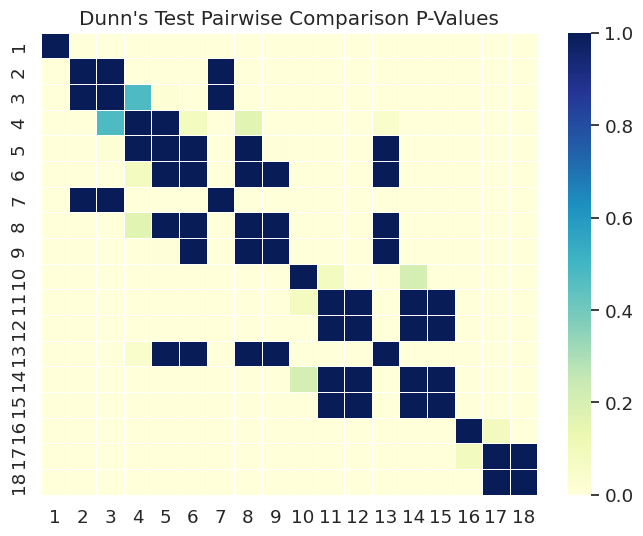

In [90]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(dunn_results, annot=False, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Dunn's Test Pairwise Comparison P-Values")
plt.show()


> Pairwise comparision between each age group (3 different age groups) and each stimulus repetition

### Regression Analysis

In [55]:
import statsmodels.api as sm

regression_results = {}
for repetition in df['stimulus_repetition'].unique():
    subset_data = df[df['stimulus_repetition'] == repetition]
    X = subset_data[['age']]
    y = subset_data['rt']
    model = sm.OLS(y, sm.add_constant(X)).fit()
    regression_results[repetition] = model

In [56]:
# Summary of regression results
for repetition, model in regression_results.items():
    print(f"Regression Results for Stimulus Repetition {repetition}:")
    print(model.summary())
             

Regression Results for Stimulus Repetition 1:
                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     436.3
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.22e-95
Time:                        03:46:34   Log-Likelihood:                -99870.
No. Observations:               13526   AIC:                         1.997e+05
Df Residuals:                   13524   BIC:                         1.998e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

#### Inferences

**Stimulus Repetition 1:**
- R-squared: 0.031
- The coefficient for age is -14.0029, with a p-value < 0.001, indicating a significant negative relationship between age and reaction time. This suggests that as age increases, reaction time decreases.

**Stimulus Repetition 2:**
- R-squared: 0.039
- The coefficient for age is -14.6235, with a p-value < 0.001, indicating a significant negative relationship between age and reaction time. Similar to repetition 1, older individuals tend to have faster reaction times.

**Stimulus Repetition 3:**
- R-squared: 0.035
- The coefficient for age is -13.8891, with a p-value < 0.001, indicating a significant negative relationship between age and reaction time. Again, older individuals exhibit faster reaction times.

**Stimulus Repetition 4:**
- R-squared: 0.049
- The coefficient for age is -15.5054, with a p-value < 0.001, indicating a significant negative relationship between age and reaction time. This trend of faster reaction times among older individuals continues.

**Stimulus Repetition 5:**
- R-squared: 0.057
- The coefficient for age is -16.7925, with a p-value < 0.001, indicating a significant negative relationship between age and reaction time. Once again, older individuals demonstrate faster reaction times.

**Stimulus Repetition 6:**
- R-squared: 0.050
- The coefficient for age is -14.8297, with a p-value < 0.001, indicating a significant negative relationship between age and reaction time. As with the other repetitions, older individuals have faster reaction times.

In summary, across all stimulus repetitions, there is a consistent and significant negative relationship between age and reaction time, indicating that older individuals tend to react faster compared to younger individuals.

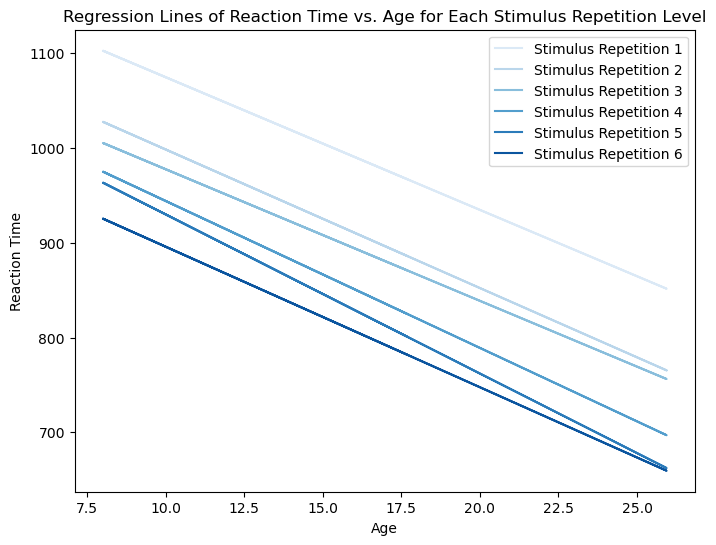

In [58]:
plt.figure(figsize=(8, 6))
for repetition, model in regression_results.items():
    plt.plot(df[df['stimulus_repetition'] == repetition]['age'], model.predict(), label=f"Stimulus Repetition {repetition}")
plt.xlabel('Age')
plt.ylabel('Reaction Time')
plt.title('Regression Lines of Reaction Time vs. Age for Each Stimulus Repetition Level')
plt.legend()
plt.show()

### Visualisation

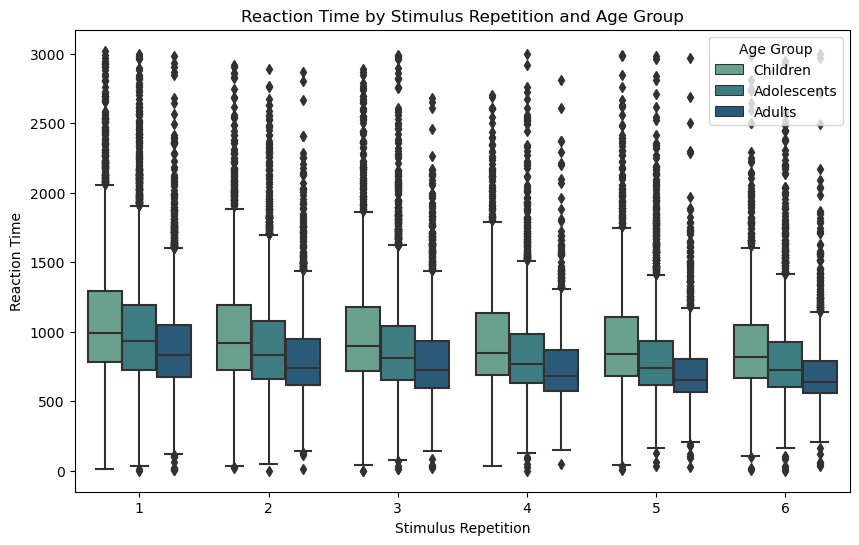

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='stimulus_repetition', y='rt', hue='age_group', palette='crest')
plt.title('Reaction Time by Stimulus Repetition and Age Group')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Reaction Time')
plt.legend(title='Age Group')
plt.show()


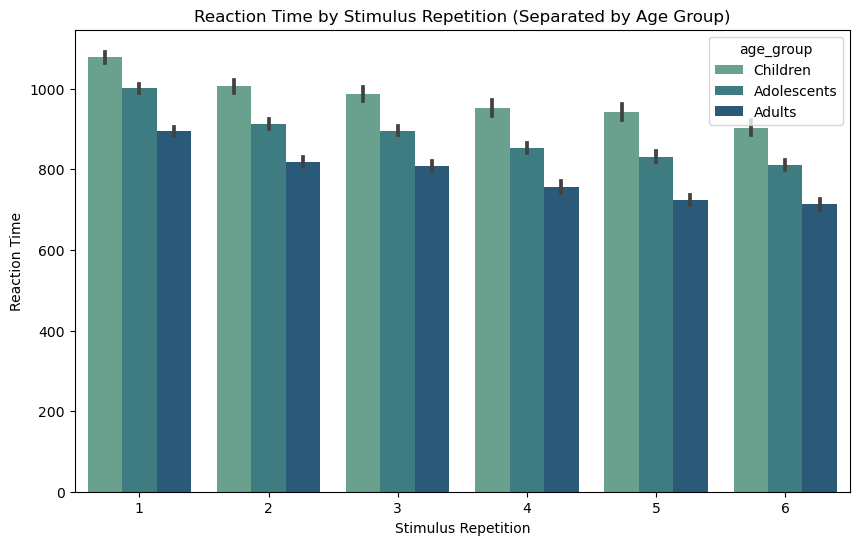

In [59]:
# plot graph of avg rt vs stimulus repetition separated by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='stimulus_repetition', y='rt', hue='age_group', data=df, palette='crest')
plt.title('Reaction Time by Stimulus Repetition (Separated by Age Group)')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Reaction Time')
plt.show()

In [63]:
# Print mean reaction time for each combination of age group and stimulus repetition
reaction_times = df.groupby(['age_group', 'stimulus_repetition'])['rt'].mean().reset_index()
print(reaction_times)


      age_group  stimulus_repetition           rt
0      Children                    1  1078.065023
1      Children                    2  1006.854283
2      Children                    3   986.907545
3      Children                    4   952.577215
4      Children                    5   941.521935
5      Children                    6   902.936165
6   Adolescents                    1  1001.110826
7   Adolescents                    2   913.250225
8   Adolescents                    3   896.028495
9   Adolescents                    4   853.329814
10  Adolescents                    5   831.241248
11  Adolescents                    6   811.424703
12       Adults                    1   895.587130
13       Adults                    2   819.477165
14       Adults                    3   807.355795
15       Adults                    4   755.615449
16       Adults                    5   723.969425
17       Adults                    6   712.829393


/tmp/ipykernel_17502/1296137205.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reaction_times = df.groupby(['age_group', 'stimulus_repetition'])['rt'].mean().reset_index()


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1

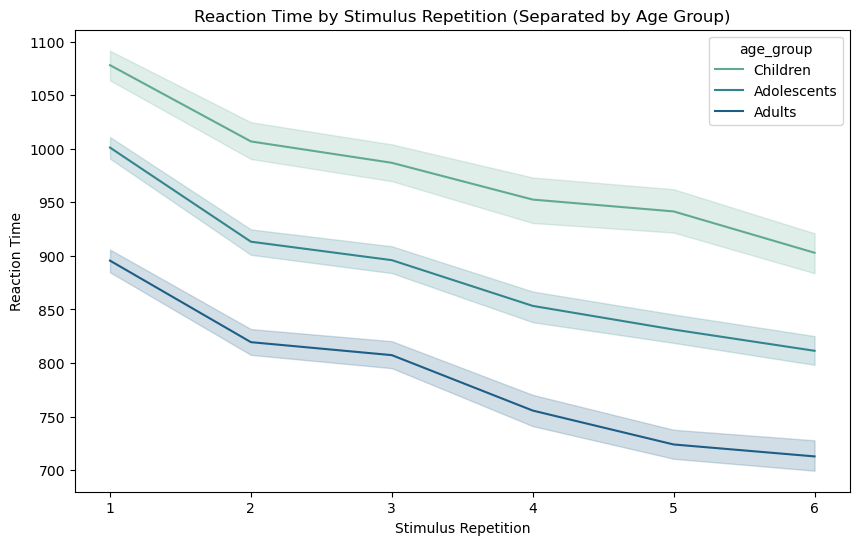

In [61]:
# plot a line graph of avg rt vs stimulus repetition separated by age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='stimulus_repetition', y='rt', hue='age_group', data=df, palette='crest')
plt.title('Reaction Time by Stimulus Repetition (Separated by Age Group)')
plt.xlabel('Stimulus Repetition')
plt.ylabel('Reaction Time')
plt.show()

> We have already seen that reaction time decreases as stimulus repeats. Based on all the plots, we can infer that this effect increases with age. Adults tend to have faster reaction times as the stimulus repeats. Reaction times tend to decrease as the stimulus is repeated for both children and adults. This suggests that both age groups responded faster as they became more familiar with the stimulus.

> The decrease in reaction time with repetition appears to be greater for adults than for children. The slope of the adults line is steeper than the slope of the children line.

## Final Inferences

#### **Hypothesis 1: Effect of Stimulus Repetition on Reaction Times**

- We reject the null hypothesis ($H_0$) as the evidence from the analysis indicates a significant relationship between stimulus repetition and reaction times.
- Across all age groups, there is a consistent *decrease* in reaction times with increasing stimulus repetition.
- This suggests that repeated stimuli do indeed have a significant effect on reaction times.


#### **Extension of above hypothesis: Interaction Effect with Age**

Null Hypothesis ($H_0$):
There is no significant relationship between the effect of stimulus repetition on reaction times and age.

Alternative Hypothesis ($H_1$):
This effect increases/decreases with age.

- Based on the analysis, we reject the null hypothesis ($H_0$) in favor of the alternative hypothesis ($H_1$).
- The effect of stimulus repetition on reaction times varies with age.
- Adults tend to exhibit faster reaction times as stimulus repetition increases, compared to children and adolescents.
- The slope of the reaction time decrease with stimulus repetition is steeper for adults compared to children, indicating age-related differences in the response to repeated stimuli.

#### **Summary of Final Inferences:**
We reject both null hypotheses, indicating:

- Repeated stimuli have a significant effect on reaction times.
- The effect of stimulus repetition on reaction times varies with age.

